# Standalone Convergence Checker for the numerical vKdV solver

Copied from Standalone Convergence Checker for the numerical KdV solver - just add bathy

Does not save or require any input data

In [1]:
import xarray as xr
from iwaves.kdv.kdvimex import KdVImEx#from_netcdf
from iwaves.kdv.vkdv import vKdV 
from iwaves.kdv.solve import solve_kdv
from iwaves.utils.plot import vKdV_plot
import iwaves.utils.initial_conditions as ics

import numpy as np
from scipy.interpolate import PchipInterpolator as pchip
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import rcParams

# Set font sizes
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'

In [21]:
# CONSTANTS FOR WHOLE NOTEBOOK
d = 252.5
L_d = 3.0e5
Nz = 100

# Functions

def run_kdv(args):
    """
    Main function for generating different soliton scenarios
    """
    rho_params, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw = args
    ####################################################
    # Inputs
    mode = 0
    
    Nz = 100

    ntout = 1800.0

    z = np.linspace(0, -d, Nz)

    dz = np.abs(z[1]-z[0])
    
    x = np.arange(-2*dx,L_d+dx,dx)
       
    Nx = x.shape[0]
    
    Nsubset = int(1000//dx)

    h = ics.depth_tanh2(bathy_params, x)

    kdvargs = dict(\
        verbose=False,\
        a0=a0,\
        Lw=Lw,\
        mode=mode,
        dt=dt,\
        nu_H=nu_H,\
        ekdv=False,\
        wavefunc=ics.eta_halfsinepulse,\
        #L_d = L_d,
        x=x,\
        Nsubset=Nsubset,
        print_freq=25
    )

    ###
#     THIS WAS COPIED FROM THE KdV VERSION. IT INITIALISES EACH vKdV 3 TIMES - QUITE SLOW. 
    ###
    
    ii=0
    #rhoz = single_tanh_rho(
    #        z, pp['rho0'][ii], pp['drho1'][ii], pp['z1'][ii], pp['h1'][ii])
    rhoz = ics.rho_double_tanh_rayson(rho_params,z)
    ######

    ## Call the vKdV run function
    mykdv, Bda = solve_kdv(rhoz, z, runtime,\
            solver='vkdv', h=h, ntout=ntout, outfile=None, **kdvargs)

    print('Done with dx={} and dt={}'.format(dx, dt))
    
    return mykdv, Bda

Text(0.5, 1.0, 'vKdV bathy')

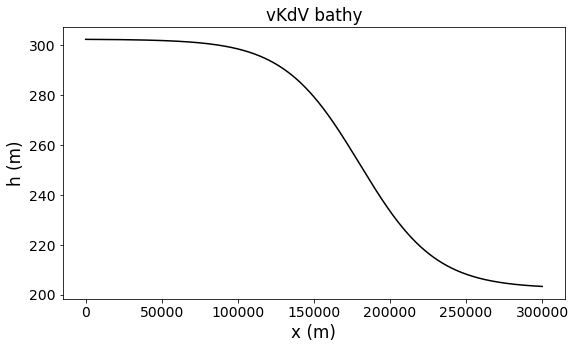

In [22]:
dx = 10
x = np.arange(-2*dx,L_d+dx,dx)
bathy_params = [L_d*0.6, 50000, d+50, d-50]       

h = ics.depth_tanh2(bathy_params, x)
    
plt.figure(figsize=(9,5))
plt.plot(x, h, 'k')
plt.ylabel('h (m)')
plt.xlabel('x (m)')
plt.title('vKdV bathy')

In [4]:
#betas = [1023.7, 1.12, 105, 52, 155, 43] # ~April 5
#betas = [1023.5, 1.22, 67, 55, 157, 52] # ~March 1

betas_w = [1023.8229810318612,
     0.9865506702797462,
     143.5428700089361,
     46.1265812512485,
     136.66278860120943,
     41.57014327398592] # 15 July 2016

betas_s =[1023.6834358117951,
     1.2249066117658955,
     156.78804559089772,
     53.66835548728355,
     73.14183287436342,
     40.21031777315428] # 1st April 2017

a0 = 20.
mode =0
nu_H = 0
runtime = 1.25*86400.

# Going to make Lw an input for the vKdV as it will really speed things up. 
dx = 100
dt = 10

z = np.linspace(0, -d, Nz)
rhoz_w = ics.rho_double_tanh_rayson(betas_w, z)
rhoz_s = ics.rho_double_tanh_rayson(betas_s, z)
Lw_w = ics.get_Lw(rhoz_w, z, z0=max(h), mode=0)
Lw_s = ics.get_Lw(rhoz_s, z, z0=max(h), mode=0)

print('Summer internal tide wavelength in {:0.0f} m of water is {:0.0f} m'.format(max(h), Lw_s))
print('Winter internal tide wavelength in {:0.0f} m of water is {:0.0f} m'.format(max(h), Lw_w))


Summer internal tide wavelength in 302 m of water is 62869 m
Winter internal tide wavelength in 302 m of water is 65169 m


In [6]:
dxs =[1600,800,400,200,100,75,50,37.5,25]
dxs =[800,400,200,100,75,50,35]
dt = 8.

all_kdv_dx_w = []
all_kdv_dx_s = []

for dx in dxs:
    
    print(' ')
    print('Running dx={}'.format(dx))
    print(' ')
    
    mykdv, B = run_kdv( (betas_w, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw_w))
    all_kdv_dx_w.append(mykdv)
    
    mykdv, B = run_kdv( (betas_s, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw_s))
    all_kdv_dx_s.append(mykdv)
    
    print(' ')
    print('Completed dx={}'.format(dx))
    print(' ')

 
Running dx=800
 
Calculating eigenfunctions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating buoyancy coefficients...
Done with dx=800 and dt=8.0
Calculating eigenfunctions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating buoyancy coefficients...
Done with dx=800 and dt=8.0
 
Completed dx=800
 
 
Running dx=400
 
Calculating eigenfunctions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating buoy

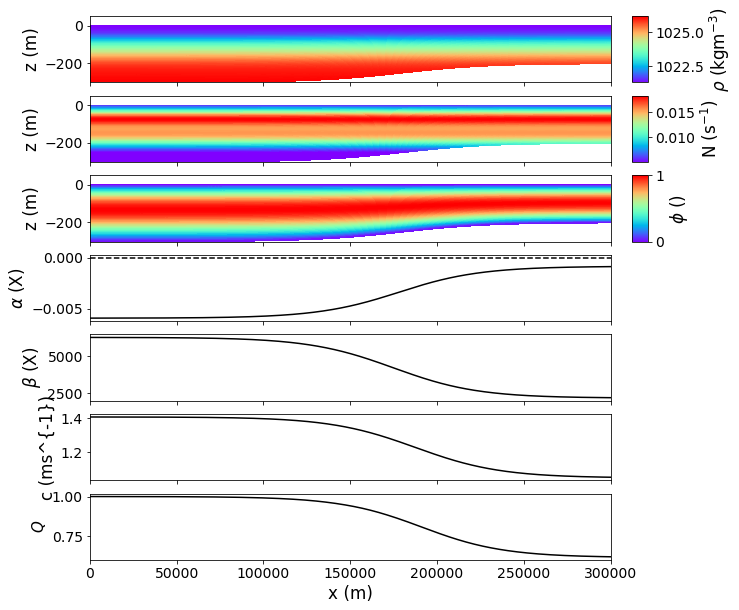

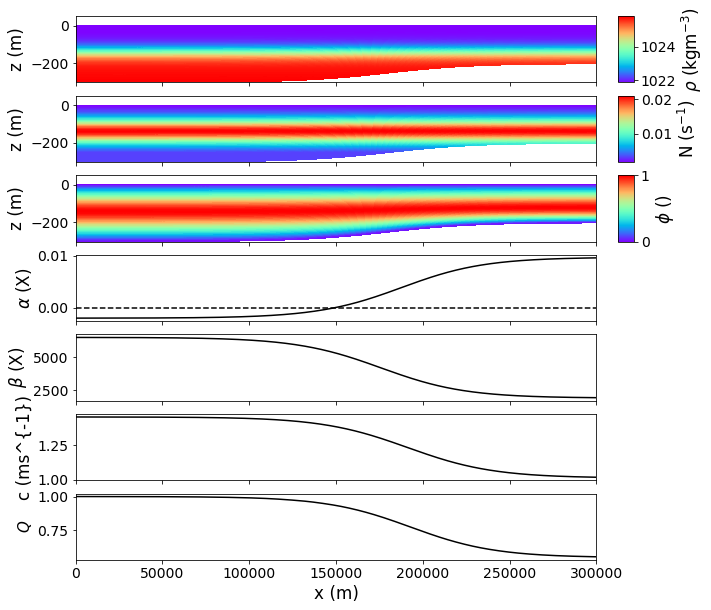

In [11]:
vKdV_plot(all_kdv_dx_s[0])
vKdV_plot(all_kdv_dx_w[0])

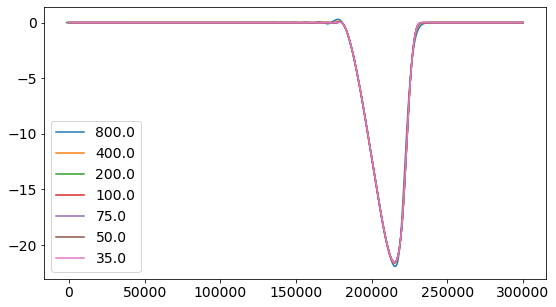

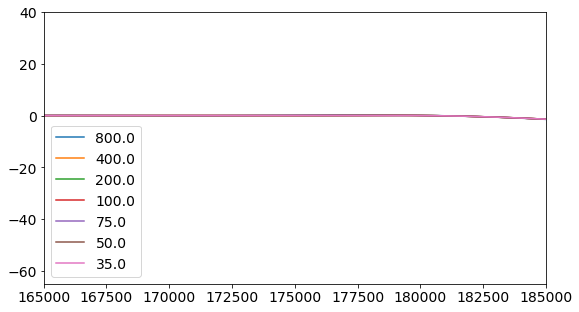

In [7]:
plt.figure(figsize=(9,5))
for mykdv in all_kdv_dx_s:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dx_s)
# plt.xlim((162200, 163600))
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for mykdv in all_kdv_dx_s:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dx_s)
# plt.xlim((162200, 163600))
plt.ylim((-65, 40))
plt.xlim((165000, 185000))
plt.legend()


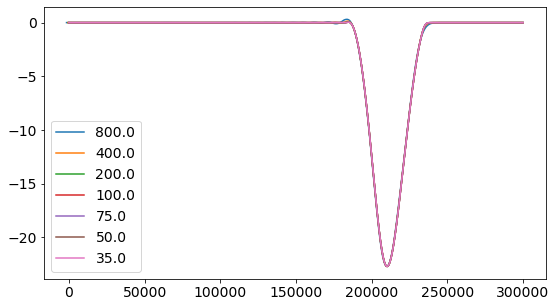

(170000.0, 210000.0)

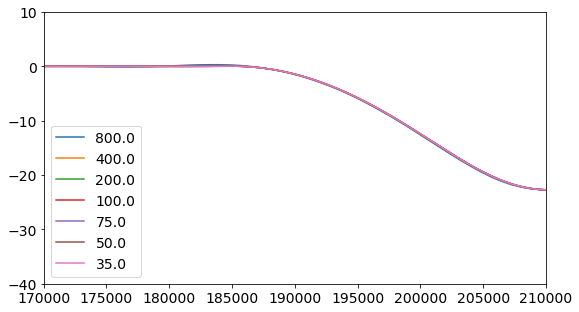

In [11]:
plt.figure(figsize=(9,5))
for mykdv in all_kdv_dx_w:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dx_s)
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for mykdv in all_kdv_dx_w:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dx_s)
    
plt.legend()
plt.ylim((-40, 10))
plt.xlim((170000, 210000))

In [12]:
# Compute the errors
X = np.arange(0,L_d, 10.)
nx = X.shape[0]
ndx = len(dxs)

solns = np.zeros((ndx, nx))
for ii, mykdv in enumerate(all_kdv_dx_w):
    Fx = pchip(mykdv.x, mykdv.B)
    solns[ii,:] = Fx(X)

# Compute the error between each solution
#err = np.diff(solns, axis=0)
err = solns - solns[-1,:]

err_rms_w = np.linalg.norm(err, ord=2, axis=1) # L2-norm
#err_rms_w = np.sqrt(np.mean(err**2,axis=1))

solns = np.zeros((ndx, nx))
for ii, mykdv in enumerate(all_kdv_dx_s):
    Fx = pchip(mykdv.x, mykdv.B)
    solns[ii,:] = Fx(X)

# Compute the error between each solution
#err = np.diff(solns, axis=0)
err = solns - solns[-1,:]

err_rms_s = np.linalg.norm(err, ord=2, axis=1) # L2-norm
#err_rms_s = np.sqrt(np.mean(err**2,axis=1))



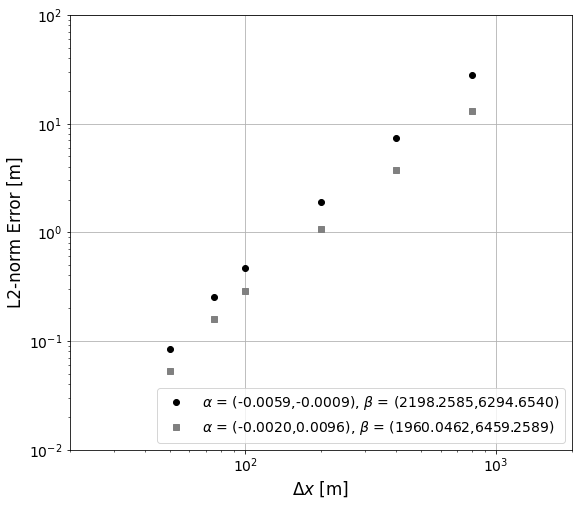

In [19]:
plt.figure(figsize=(9,8))
plt.loglog(dxs[:-1],err_rms_s[:-1],'ko')
plt.loglog(dxs[:-1],err_rms_w[:-1],'s', color='0.5')
plt.xlim(2e1,2e3)
plt.ylim(1e-2,1e2)
plt.grid(b=True)
x0 = np.array([50,100.])
plt.plot(x0, 100/x0[0]**2*x0**2, 'k--')
plt.plot(x0, 100/x0[0]**1*x0**1, 'k:')
plt.ylabel('L2-norm Error [m]')
plt.xlabel('$\Delta x$ [m]')

alpha_s = -2*all_kdv_dx_s[0].c1*all_kdv_dx_s[0].r10 
beta_s = -1*all_kdv_dx_s[0].r01
alpha_w = -2*all_kdv_dx_w[0].c1*all_kdv_dx_w[0].r10 
beta_w = -1*all_kdv_dx_w[0].r01
plt.legend((r'$\alpha$ = (%3.4f,%3.4f), $\beta$ = (%3.4f,%3.4f)'%(min(alpha_s), max(alpha_s), min(beta_s), max(beta_s)),
           r'$\alpha$ = (%3.4f,%3.4f), $\beta$ = (%3.4f,%3.4f)'%(min(alpha_w), max(alpha_w), min(beta_w), max(beta_w))), loc='lower right')

In [23]:
# Delta t comparison
dts = [20,10.,5,2.5,1.25,0.6,0.3]
dx = 50.

all_kdv_dt_w = []
all_kdv_dt_s = []

for dt in dts:
    
    print(' ')
    print('Running dt={}'.format(dt))
    print(' ')
    
    mykdv, B = run_kdv( (betas_w, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw_w))
    all_kdv_dt_w.append(mykdv)
    
    mykdv, B = run_kdv( (betas_s, bathy_params, a0, L_d, mode, nu_H, dx, runtime, dt, Lw_s))
    all_kdv_dt_s.append(mykdv)
    
    
    print(' ')
    print('Completed dt={}'.format(dt))
    print(' ')
    

 
Running dt=20
 
Calculating eigenfunctions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating buoyancy coefficients...
Done with dx=50.0 and dt=20
Calculating eigenfunctions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating buoyancy coefficients...
Done with dx=50.0 and dt=20
 
Completed dt=20
 
 
Running dt=10.0
 
Calculating eigenfunctions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating nonlinear structure functions...
0.0 % complete...
25.0 % complete...
50.0 % complete...
75.0 % complete...
100.0 % complete...
Calculating buoya

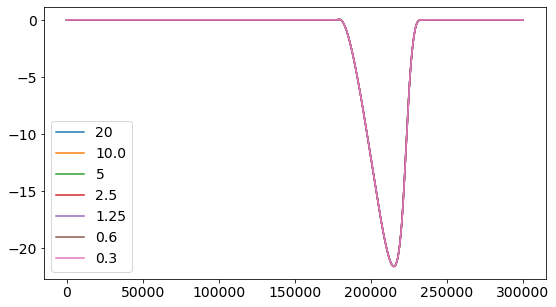

(170000.0, 190000.0)

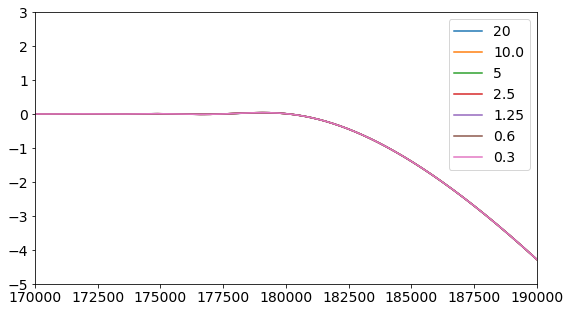

In [32]:
plt.figure(figsize=(9,5))
for mykdv in all_kdv_dt_s:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dt_s)
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for mykdv in all_kdv_dt_s:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dt_s)
    
plt.legend()
plt.ylim((-5, 3))
plt.xlim((170000, 190000))

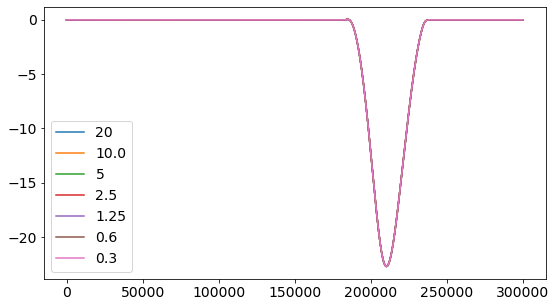

(175000.0, 205000.0)

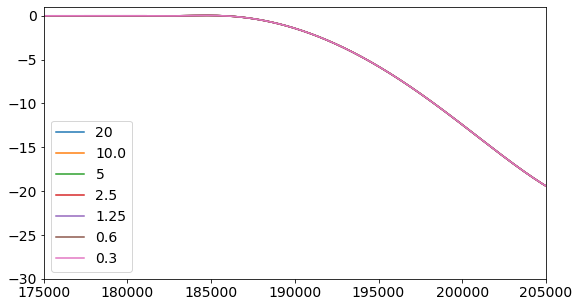

In [33]:
plt.figure(figsize=(9,5))
for mykdv in all_kdv_dt_w:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dt_s)
plt.legend()
plt.show()

plt.figure(figsize=(9,5))
for mykdv in all_kdv_dt_w:
    plt.plot(mykdv.x, mykdv.B, label=mykdv.dt_s)
    
plt.legend()
plt.ylim((-30, 1))
plt.xlim((175000, 205000))

In [34]:
# Compute the errors
X = np.arange(0,L_d, 10.)
nx = X.shape[0]
ndx = len(dts)

solns = np.zeros((ndx, nx))
for ii, mykdv in enumerate(all_kdv_dt_w):
    print(ii)
    Fx = pchip(mykdv.x, mykdv.B)
    solns[ii,:] = Fx(X)

# Compute the error between each solution
#err = np.diff(solns, axis=0)
err = solns - solns[-1,:]

err_rms_w_t = np.linalg.norm(err, ord=2, axis=1) # L2-norm
#err_rms_w = np.sqrt(np.mean(err**2,axis=1))

solns = np.zeros((ndx, nx))
for ii, mykdv in enumerate(all_kdv_dt_s):
    print(ii)
    Fx = pchip(mykdv.x, mykdv.B)
    solns[ii,:] = Fx(X)

# Compute the error between each solution
#err = np.diff(solns, axis=0)
err = solns - solns[-1,:]

err_rms_s_t = np.linalg.norm(err, ord=2, axis=1) # L2-norm
#err_rms_s = np.sqrt(np.mean(err**2,axis=1))

0
1
2
3
4
5
6
0
1
2
3
4
5
6


<ipython-input-40-e9ed3f1827fb>:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,0.5e2)


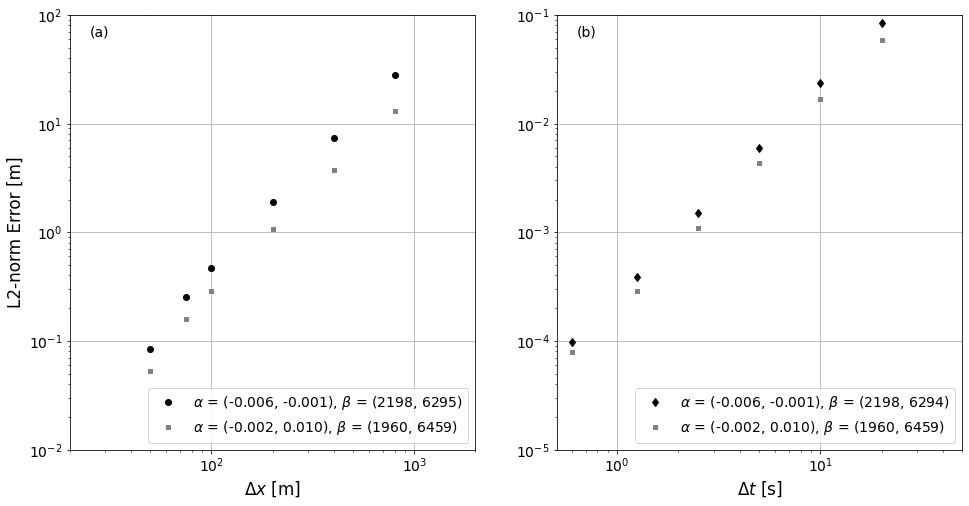

In [40]:
plt.figure(figsize=(16,8))
ax=plt.subplot(121)
plt.loglog(dxs[:-1],err_rms_s[:-1],'ko', markersize=6)
plt.loglog(dxs[:-1],err_rms_w[:-1],'s', color='0.5', markersize=4)
plt.xlim(2e1,2e3)
plt.ylim(1e-2,1e2)
plt.grid(b=True)
x0 = np.array([50,100.])
plt.plot(x0, 100/x0[0]**2*x0**2, 'k--')
plt.plot(x0, 100/x0[0]**1*x0**1, 'k:')
plt.ylabel('L2-norm Error [m]')
plt.xlabel('$\Delta x$ [m]')

alpha_s = -2*all_kdv_dx_s[0].c1*all_kdv_dx_s[0].r10 
beta_s = -1*all_kdv_dx_s[0].r01
alpha_w = -2*all_kdv_dx_w[0].c1*all_kdv_dx_w[0].r10 
beta_w = -1*all_kdv_dx_w[0].r01

plt.legend((r'$\alpha$ = (%3.3f, %3.3f), $\beta$ = (%3.0f, %3.0f)'%(min(alpha_s), max(alpha_s), min(beta_s), max(beta_s)),
           r'$\alpha$ = (%3.3f, %3.3f), $\beta$ = (%3.0f, %3.0f)'%(min(alpha_w), max(alpha_w), min(beta_w), max(beta_w))), loc='lower right')

plt.text(0.05,0.95,'(a)',transform=ax.transAxes)


ax=plt.subplot(122)
plt.loglog(dts[:-1],err_rms_s_t[:-1],'kd', markersize=6)
plt.loglog(dts[:-1],err_rms_w_t[:-1],'s', color='0.5', markersize=4)
plt.xlim(0,0.5e2)
plt.ylim(1e-5,1e-1)
plt.grid(b=True)
x0 = np.array([5,20])
plt.plot(x0, 10/x0[0]**2*x0**2, 'k--')
plt.plot(x0, 10/x0[0]**1*x0**1, 'k:')
#plt.ylabel('L2-norm Error [m]')
plt.xlabel('$\Delta t$ [s]')

plt.text(0.05,0.95,'(b)',transform=ax.transAxes)
alpha_s = -2*all_kdv_dt_s[0].c1*all_kdv_dt_s[0].r10 
beta_s = -1*all_kdv_dt_s[0].r01
alpha_w = -2*all_kdv_dt_w[0].c1*all_kdv_dt_w[0].r10 
beta_w = -1*all_kdv_dt_w[0].r01

plt.legend((r'$\alpha$ = (%3.3f, %3.3f), $\beta$ = (%3.0f, %3.0f)'%(min(alpha_s), max(alpha_s), min(beta_s), max(beta_s)),
           r'$\alpha$ = (%3.3f, %3.3f), $\beta$ = (%3.0f, %3.0f)'%(min(alpha_w), max(alpha_w), min(beta_w), max(beta_w))), loc='lower right')

plt.savefig('../FIGURES/vkdv_convergence_dxdt.png',dpi=150)
plt.savefig('../FIGURES/vkdv_convergence_dxdt.pdf',dpi=150)